In [4]:
import pandas as pd    
data = pd.read_csv('Datasets/mr_beast.csv')    

data['publish_day'] = pd.Categorical(data['publish_day'],   
                                       categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],   
                                       ordered=True) 

In [2]:
import os
print(os.getcwd())

c:\Users\athar\myfiles\Assignments


In [3]:
os.chdir("../")

In [ ]:
%pwd

'c:\\Users\\athar\\myfiles'

In [15]:
data.dtypes

video_id                object
title                   object
description             object
publish_date            object
views                    int64
likes                    int64
comments                 int64
duration_seconds         int64
number_of_tags           int64
length_description       int64
length_title             int64
time_since               int64
publish_day           category
dtype: object

In [16]:
#Data Splitting

train = data.sample(frac=0.9, random_state=617)
test = data.drop(train.index)


In [18]:
import numpy as np

print("Median Likes: ",np.median(train.likes))

Median Likes:  10581.0


Question 2

<function matplotlib.pyplot.show(close=None, block=None)>

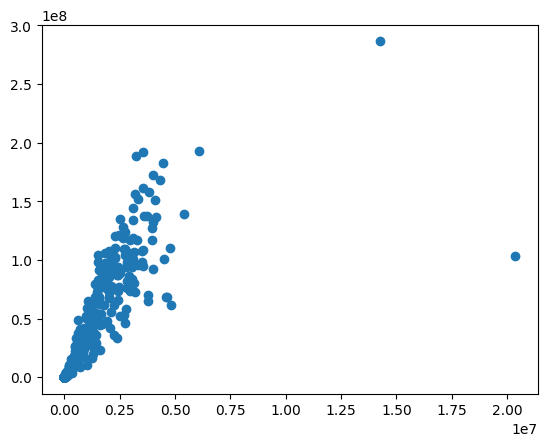

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data.likes,data.views)
plt.show

In [26]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

data_numeric=data.select_dtypes("int64")


In [28]:
import pandas as pd
from scipy.stats import pearsonr


# Compute Pearson correlation and p-values
results = []
for col in data_numeric:
    r, p = pearsonr(data_numeric[col], data_numeric['likes'])
    results.append({'variable': col, 'correlation': r, 'p_value': p})

# Create dataframe of results
corr_df = pd.DataFrame(results)

# Filter for statistically significant correlations (p < 0.05)
significant_corr = corr_df[corr_df['p_value'] < 0.05]

print("Variables with statistically significant Pearson correlation with 'likes':")
print(significant_corr)


Variables with statistically significant Pearson correlation with 'likes':
         variable  correlation        p_value
0           views     0.826236  7.087254e-181
1           likes     1.000000   0.000000e+00
2        comments     0.829215  2.570220e-183
4  number_of_tags    -0.364504   5.162638e-24
7      time_since    -0.693046  5.324625e-104


In [27]:
data_numeric

,views,likes,comments,duration_seconds,number_of_tags,length_description,length_title,time_since
0,42003849,2087088,68069,494,0,552,24,4
1,65090668,3762729,225420,931,0,312,44,388
2,20088769,1302211,91010,15,0,64,30,483
3,73775726,2979131,131689,1013,0,1741,34,676
4,51874612,2503329,101765,784,0,509,29,1180
...,...,...,...,...,...,...,...,...
714,497735,19931,2596,29,5,0,25,84151
715,540975,23003,2534,31,6,160,36,84166
716,648343,27327,2871,126,7,187,25,84168
717,747652,32029,3524,90,5,313,30,84169


Assignment 4b

In [32]:
train_numeric=train.select_dtypes('int64')
test_numeric=test.select_dtypes('int64')

In [35]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(train_numeric[['time_since']],train_numeric[['likes']])

LinearRegression()

In [ ]:
model1.

In [42]:
from statsmodels.formula.api import ols

model = ols('likes ~ time_since',data=train_numeric).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     538.6
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           4.34e-87
Time:                        16:33:42   Log-Likelihood:                -9895.4
No. Observations:                 647   AIC:                         1.979e+04
Df Residuals:                     645   BIC:                         1.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.194e+06   1.16e+05     27.639      0.0

In [50]:
pred_values= model1.predict(train[['time_since']])
pred_values

array([[ 1922936.00218185],
       [ 1636158.54122944],
       [ 2173908.4465845 ],
       [ 1014992.10337419],
       [ -845567.63278975],
       [ -682493.3716802 ],
       [ -504769.41335513],
       [ 1936814.66270181],
       [ -431569.11707102],
       [ 1785305.95202556],
       [  222896.46807344],
       [ -751886.67428001],
       [  296771.42146616],
       [ -326563.55709533],
       [   39148.78556436],
       [ -684902.8613538 ],
       [  502734.59876587],
       [ -635219.18428407],
       [  417101.33576597],
       [ 2814639.94058941],
       [  414932.79505972],
       [ -322804.75320451],
       [ 1476553.94524988],
       [  164683.19755916],
       [  141889.42524686],
       [ 1963463.61849188],
       [ -625773.98476354],
       [  661182.6397021 ],
       [ 2002690.11037816],
       [ -511612.36402816],
       [  712071.06160863],
       [ -493107.48333488],
       [ -663217.45429136],
       [  990849.01684468],
       [ -589968.96821378],
       [ 2164656.006

In [65]:
predicted_25000=model1.predict(pd.DataFrame({'time_since':[25000]}))

In [68]:
predicted_25000.round(4)

array([[1989437.9172]])

In [ ]:
model2=LinearRegression()
model2.fit(train_numeric[['number_of_tags']],train_numeric[['likes']])

In [59]:
from statsmodels.formula.api import ols

model2 = ols('likes ~ number_of_tags',data=train_numeric).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     95.36
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           4.22e-21
Time:                        16:45:45   Log-Likelihood:                -10047.
No. Observations:                 647   AIC:                         2.010e+04
Df Residuals:                     645   BIC:                         2.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.205e+06   7.44e+04     16.

In [61]:
model3 = ols('likes ~ publish_day', data=train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.796
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           5.33e-07
Time:                        16:51:05   Log-Likelihood:                -10072.
No. Observations:                 647   AIC:                         2.016e+04
Df Residuals:                     640   BIC:                         2.019e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.675e+05   1.86

In [64]:
model3.rsquared.round(4)

0.0599

Assignment 4c

In [5]:
data.head(2)

,video_id,title,description,publish_date,views,likes,comments,duration_seconds,number_of_tags,length_description,length_title,time_since,publish_day
0,jdMNoQE3mIQ,I Survived A Plane Crash,Thanks again to the Coast Guard for the lift!\...,2022-08-20 20:00:00+00:00,42003849,2087088,68069,494,0,552,24,4,Sat
1,2isYuQZMbdU,"I Gave My 100,000,000th Subscriber An Island","🚀Launch a store on Shopify, I’ll buy from 100 ...",2022-08-04 19:59:59+00:00,65090668,3762729,225420,931,0,312,44,388,Thu


In [6]:
X=data[['duration_seconds', 'number_of_tags', 'length_description', 'length_title', 'time_since', 'publish_day']]
y=data['likes']

In [7]:
y_binned = pd.cut(data.likes,bins=[0,1000,10000,100000,1000000,25000000])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=617,stratify=y_binned)

In [11]:
import numpy as np
np.median(X_train.duration_seconds)

274.0

In [ ]:
train_dummies=pd.get_dummies(X_train.publish_day,drop_first=True)
test_dummies=pd.get_dummies(X_test.publish_day,drop_first=True)

In [22]:
dum=pd.get_dummies(data.publish_day,drop_first=True)
np.mean(dum['Tue']).round(4)

0.1071

In [21]:
print(np.mean(train_dummies['Tue']).round(4))
print(np.mean(test_dummies['Tue']).round(4))
print(((np.mean(train_dummies['Tue'])+np.mean(test_dummies['Tue']))/2).round(4))

0.1082
0.0972
0.1027


In [14]:
# Combine train & test to ensure consistent columns
combined = pd.concat([X_train, X_test], axis=0)

# Create dummies, drop_first=True to avoid multicollinearity
combined_dummies = pd.get_dummies(combined['publish_day'], drop_first=True)

# Split back into train and test
X_train_dummies = combined_dummies.iloc[:len(X_train), :]
X_test_dummies = combined_dummies.iloc[len(X_train):, :]

# Add dummies to original X_train and X_test (optional)
X_train = pd.concat([X_train, X_train_dummies], axis=1)
X_test = pd.concat([X_test, X_test_dummies], axis=1)

# Optionally drop original column
X_train.drop('publish_day', axis=1, inplace=True)
X_test.drop('publish_day', axis=1, inplace=True)

In [16]:
from sklearn.linear_model import LinearRegression
model4=LinearRegression()
model4.fit(X_train,y_train)
pred4= model4.predict(X_train)
pred4[-1].round(4)

-142999.6539

In [17]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_train,pred4).round(4)

1030940.8297

In [18]:
pred4_test=model4.predict(X_test)
root_mean_squared_error(y_test,pred4_test).round(4)

570004.4991